In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [3]:
rng = np.random.RandomState(123)

In [4]:
x_norm = rng.normal(loc = 10,scale = 1,size = 1000)

x = np.arange(0,2*np.pi,0.01)
y = np.tanh(x)

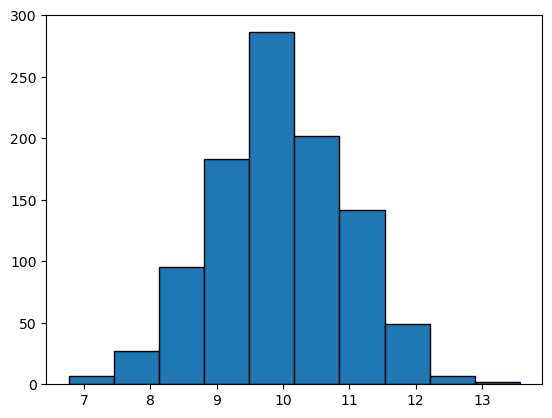

In [5]:
plt.hist(x_norm,edgecolor = "black");

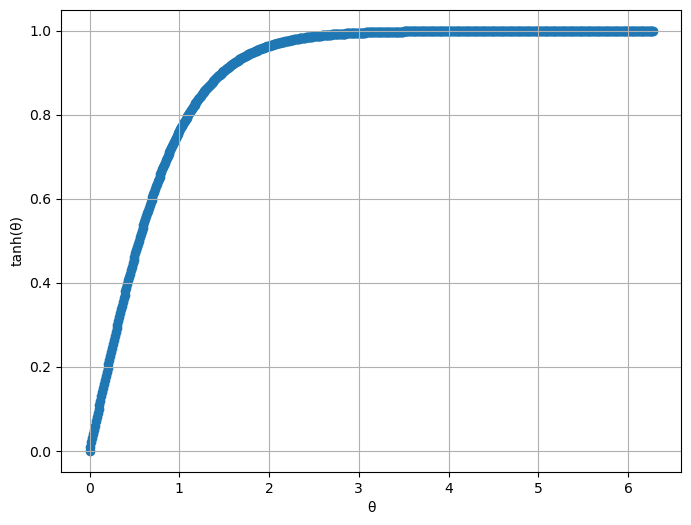

In [6]:
fig,ax = plt.subplots(figsize = (8,6))
ax.scatter(x,y)
ax.grid()
ax.set(xlabel = "θ", ylabel = "tanh(θ)");

In [7]:
a = np.array([1,2,3,4,5])
b = np.array([2,4,6,8,10])

In [8]:
sum([i*j for i,j in zip(a,b)])

110

In [9]:
np.dot(a,b)

110

In [10]:
iris =pd.read_csv(r"C:\Users\KAsab\Downloads\Iris.csv")

In [11]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
X = iris.iloc[0:100,[1,3]].values
y = iris.iloc[0:100,-1].values

In [26]:
y[0:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [39]:
X[0:10]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5]])

In [54]:
y = np.where(y =="Iris-setosa",1,0)
y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

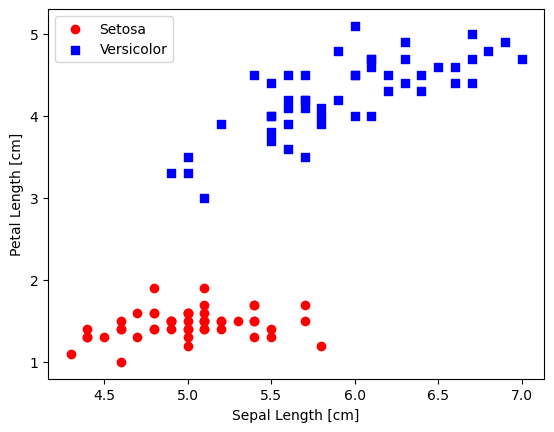

In [55]:
plt.scatter(X[:50,0],X[:50,1],color = "red",marker = "o",label = "Setosa")
plt.scatter(X[50:100,0],X[50:100,1],color = "blue",marker = "s",label = "Versicolor")
plt.xlabel("Sepal Length [cm]")
plt.ylabel("Petal Length [cm]")
plt.legend(loc = "upper left")
plt.show()

In [56]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1,random_state = 1,max_iter = 10)

In [57]:
ppn.fit(X,y)


Perceptron(eta0=0.1, max_iter=10, random_state=1)

In [62]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [63]:
print("Class labels: ", np.unique(y))

Class labels:  [0 1 2]


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1,stratify = y)

In [66]:
print("Labels count in y: ",np.bincount(y))

Labels count in y:  [50 50 50]


In [68]:
print("Labels count in y_train: ",np.bincount(y_train))

Labels count in y_train:  [35 35 35]


In [69]:
print("Labels count in y_test",np.bincount(y_test)) 

Labels count in y_test [15 15 15]


In [70]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [78]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1,random_state = 1)
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.1, random_state=1)

In [79]:
y_pred = ppn.predict(X_test_std)

In [80]:
print("Misclassified examples: %d" % (y_test !=y_pred).sum())

Misclassified examples: 1


In [81]:
from sklearn.metrics import accuracy_score

In [82]:
print("Accuracy: %.3f" % accuracy_score(y_test,y_pred))

Accuracy: 0.978


In [85]:
print("Accuracy: %.3f" % ppn.score(X_test_std,y_test))

Accuracy: 0.978


In [86]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

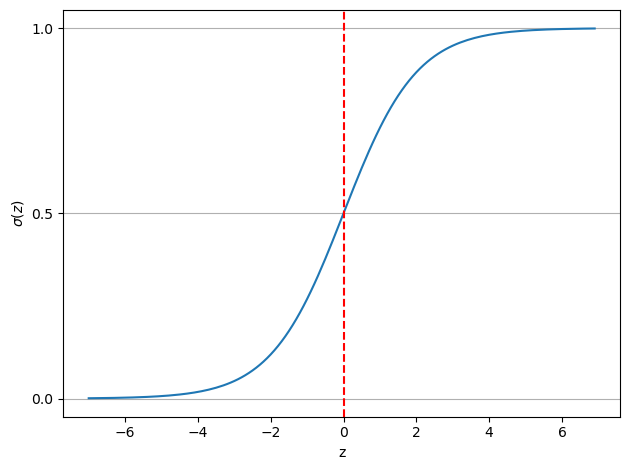

In [96]:
z = np.arange(-7,7,0.1)
sigma_z = sigmoid(z)
plt.plot(z,sigma_z)
plt.axvline(0.0,color = "red",linestyle = "--")
plt.xlabel("z")
plt.ylabel(r"$\sigma (z)$")
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [99]:
iris.data[10]

array([5.4, 3.7, 1.5, 0.2])

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
lr = LogisticRegression()

In [103]:
lr.fit(X_train_std,y_train)

LogisticRegression()

In [119]:
y_probs = lr.predict_proba(X_test_std)

In [120]:
y_probs[10]

array([9.35447609e-01, 6.45404875e-02, 1.19036123e-05])

In [121]:
y_probs[:3,:]

array([[2.61403487e-05, 4.46361859e-02, 9.55337674e-01],
       [9.15881407e-01, 8.40984144e-02, 2.01789970e-05],
       [9.55024940e-01, 4.49699039e-02, 5.15642813e-06]])

In [122]:
y_probs[:3,:].sum(axis =1)

array([1., 1., 1.])

In [123]:
y_probs.argmax(axis = 1)

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0], dtype=int64)

In [136]:
y_preds = lr.predict(X_test_std)

In [137]:
y_preds

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])